In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from matplotlib.ticker import NullFormatter

**PROBLEM 2:**

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rat

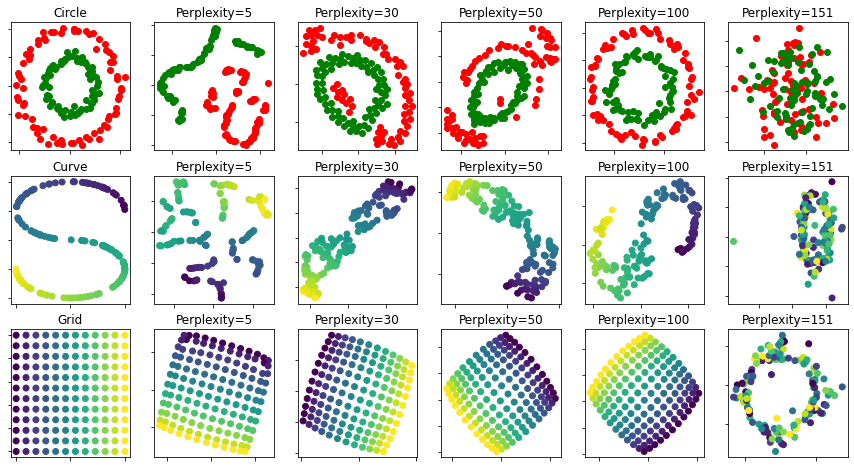

In [34]:
n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 6, figsize=(15, 8))
perplexities = [5, 30, 50, 100, 151]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.set_title("Circle")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 300, random_state=0)
    Y = tsne.fit_transform(X)
    ax = subplots[0][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

X1, colors = datasets.make_s_curve(
    n_samples=n_samples, random_state=0
)

ax = subplots[1][0]
ax.scatter(X1[:, 0], X1[:, 2], c = colors)
ax.set_title("Curve")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 300, random_state=0, learning_rate="auto")
    Y1 = tsne.fit_transform(X1)
    ax = subplots[1][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y1[:, 0], Y1[:, 1], c = colors)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")   

x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X2 = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X2[:, 0], X2[:, 1], c=color)
ax.set_title("Grid")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 400, random_state=0)
    Y2 = tsne.fit_transform(X2)

    ax = subplots[2][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y2[:, 0], Y2[:, 1], c = color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

- When Perplexity =5, sigma is very low, all probability is in the nearest neighborhood. On the graph, all points closest to each other belongs to the same neighborhood

- When Perplexity =30 and 50, sigma is higher, a larger neighborhood's local structure is preserve and the shape resembles original data.

- When Perplexity =100, for all the circle data, the shape is similar to the original data, but distance between points and circle's size vary. On the s-curve, the shapes diverge from the original.

- When perplexity =151, the perplexity is too high, which leads to uniform weights, ambiguous neighborhood for data points.

- t-SNE for higher perplexities finds meaningful topology of two concentric circles, however the size and the distance of the circles varies slightly from the original. 

- Contrary to the two circles dataset, the shapes visually diverge from S-curve topology on the S-curve dataset even for larger perplexity values.

- As perplexity increase, the square dataset edges appear rounder and the sides seems clustered as the points's is very near to each other.

**PROBLEM 3:**

In [19]:
import gensim

import multiprocessing
from gensim.models import Word2Vec

def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [9]:
model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)

In [22]:
keys = ['Paris', 'beautiful', 'favorite', "flower", "steak", "clothes", "fly", "travel", "man", "Python"]

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [23]:
word_clusters

[['Parisian',
  'Hopital_Europeen_Georges_Pompidou',
  'Spyker_D##_Peking',
  'France',
  'Pantheon_Sorbonne',
  'Aeroports_De',
  'Grigny_south',
  'Place_Denfert_Rochereau',
  'guest_Olivier_Dolige',
  'Lazard_Freres_Banque'],
 ['gorgeous',
  'lovely',
  'stunningly_beautiful',
  'breathtakingly_beautiful',
  'wonderful',
  'fabulous',
  'loveliest',
  'prettiest',
  'beatiful',
  'magnificent'],
 ['favorites',
  'fave',
  'Favorite',
  'Favourite',
  'favourtie',
  'faves',
  'favs',
  'Favorites',
  'best',
  'popular'],
 ['floral',
  'flowers',
  'roses',
  'orchid',
  'tulip',
  'peony',
  'blooms',
  'blossoms',
  'chrysanthemum',
  'anthurium'],
 ['steaks',
  'filet_mignon',
  'porterhouse',
  'sirloin',
  'prime_rib',
  'filet',
  'porterhouse_steak',
  'tenderloin',
  'roast_beef',
  'rib_eye'],
 ['clothing',
  'underwear',
  'underclothes',
  'garments',
  'jeans',
  'Clothes',
  'undergarments',
  'dresses',
  'shoes',
  'pajamas'],
 ['flying',
  'flew',
  'flies',
  'flys'

**Embbeded word closely related:**
- Words that are in different forms: 'flying', 'flew', 'flies', 'flys', 'flown', 'Fly', 'flight'
- Words that contains the original word: 'Perl_Python', 'IronPython', 'Java_Python', 'Python_Ruby'
- Words with different writing: 'favorites', 'fave', 'Favorite', 'Favourite', 'favourtie', 'faves', 'favs', 'Favorites'
- Words that are close in meaning: 'gorgeous', 'lovely', 'stunningly_beautiful', 'breathtakingly_beautiful', 'wonderful', 'fabulous', 'loveliest', 'prettiest', 'beatiful', 'magnificent'
- Words that are in the same fields: 'roses', 'orchid', 'tulip', 'peony', 'blooms', 'blossoms', 'chrysanthemum', 'anthurium'
- Words that are closely embedded can be related character or events

In [26]:
tsne_model_en_2d = manifold.TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


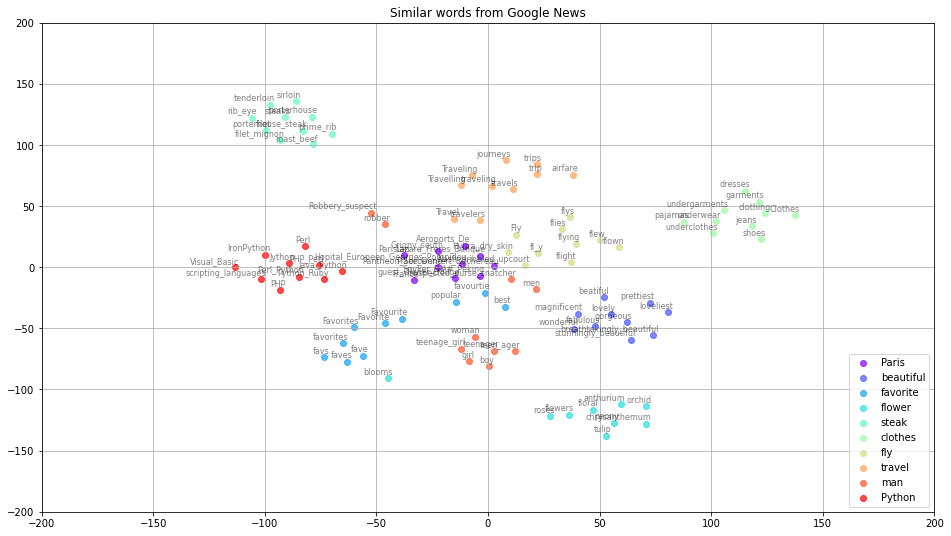

In [33]:
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.xlim(-200, 200)
    plt.ylim(-200, 200)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

- The words associated with original words are placed close to each other as they have a similar context. The words associated with "steak" and "flower" are placed far from each other because they have different context.
- The words associated with original words but have too much difference in context with each other also placed far away from each other. (For example: 'Robbery_suspect', 'robber', 'purse_snatcher' and the other words that are related to 'man')
